In [1]:
import rdflib
from rdflib import Graph
import pprint
from SPARQLWrapper import SPARQLWrapper
from rdflib.plugin import register, Serializer, Parser
register('json-ld', Serializer, 'rdflib_jsonld.serializer', 'JsonLDSerializer')
register('json-ld', Parser, 'rdflib_jsonld.parser', 'JsonLDParser')

## Section 1: RDF Graphs

This section shows you how to use RDFLib to parse a Turtle RDF file and serialise it into different formats.

In [2]:
g = Graph()
g.parse("bb-king.ttl", format="turtle")

print("No. RDF statements: {}\n".format(len(g)))

for stmt in g:
    pprint.pprint(stmt)
    print()

No. RDF statements: 3

(rdflib.term.URIRef('http://example.org/BBKing'),
 rdflib.term.URIRef('http://example.org/plays_instrument'),
 rdflib.term.URIRef('http://example.org/Guitar'))

(rdflib.term.URIRef('http://example.org/BBKing'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))

(rdflib.term.URIRef('http://example.org/BBKing'),
 rdflib.term.URIRef('http://example.org/is_born_on'),
 rdflib.term.Literal('1925-09-16', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date')))



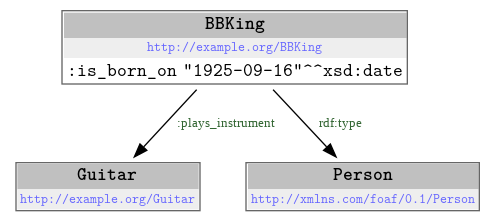

In [3]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)

In [4]:
#Serialise the graph in JSON-LD format
print(g.serialize(format='json-ld', indent=4).decode('utf-8'))

[
    {
        "@id": "http://example.org/BBKing",
        "@type": [
            "http://xmlns.com/foaf/0.1/Person"
        ],
        "http://example.org/is_born_on": [
            {
                "@type": "http://www.w3.org/2001/XMLSchema#date",
                "@value": "1925-09-16"
            }
        ],
        "http://example.org/plays_instrument": [
            {
                "@id": "http://example.org/Guitar"
            }
        ]
    }
]


In [5]:
#serialise in Turtle format
print(g.serialize(format='turtle').decode('utf-8'))

@prefix : <http://example.org/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

:BBKing a foaf:Person ;
    :is_born_on "1925-09-16"^^xsd:date ;
    :plays_instrument :Guitar .




In [6]:
#serialise in N-Triples format
print(g.serialize(format='ntriples').decode('utf-8'))

<http://example.org/BBKing> <http://example.org/plays_instrument> <http://example.org/Guitar> .
<http://example.org/BBKing> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://xmlns.com/foaf/0.1/Person> .
<http://example.org/BBKing> <http://example.org/is_born_on> "1925-09-16"^^<http://www.w3.org/2001/XMLSchema#date> .




In [7]:
#serialise in RDF/XML format
print(g.serialize(format='xml').decode('utf-8'))

<?xml version="1.0" encoding="UTF-8"?>
<rdf:RDF
   xmlns="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/BBKing">
    <plays_instrument rdf:resource="http://example.org/Guitar"/>
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <is_born_on rdf:datatype="http://www.w3.org/2001/XMLSchema#date">1925-09-16</is_born_on>
  </rdf:Description>
</rdf:RDF>

